In [3]:
import numpy as np
import zipfile
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Input, BatchNormalization, Dropout
from keras import Sequential
import matplotlib.pyplot as plt

In [ ]:
zipped_file = zipfile.ZipFile(r"/mnt/c/Users/Subham Pathak/Desktop/AI/DEEP_LEARNING/datasets/archive.zip", 'r')
zipped_file.extractall(r"/mnt/c/Users/Subham Pathak/Desktop/AI/DEEP_LEARNING/notebooks/CNN/datasets")
zipped_file.close()

In [4]:
train_dataset = keras.utils.image_dataset_from_directory(
    labels = 'inferred',
    directory = '/mnt/c/Users/Subham Pathak/Desktop/AI/DEEP_LEARNING/notebooks/CNN/datasets/train',
    image_size = (256,256),
    batch_size = 32,
    label_mode = 'int'    
    
)


test_dataset = keras.utils.image_dataset_from_directory(
    
    directory = '/mnt/c/Users/Subham Pathak/Desktop/AI/DEEP_LEARNING/notebooks/CNN/datasets/test',
    labels = 'inferred',
    label_mode = 'int',
    image_size = (256,256),
    batch_size = 32
)


Found 20000 files belonging to 2 classes.


I0000 00:00:1767890469.484085   17244 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1766 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6


Found 5000 files belonging to 2 classes.


In [5]:
#normalize

def norm(image, label):
    image =tf.cast(image/255, dtype = tf.float32)
    return image, label

In [23]:
train_dataset = train_dataset.map(norm)
test_dataset = test_dataset.map(norm)
train_dataset = train_dataset.ignore_errors()
test_dataset  = test_dataset.ignore_errors()


In [24]:
# CNN MODEL
model = Sequential()

model.add(Input(shape=(256,256,3)))

model.add(Conv2D(32, kernel_size=(3,3), padding='same', strides = 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(62, kernel_size=(3,3), padding='same', strides=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(124, kernel_size=(3,3), padding='same', strides=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2))


model.add(Flatten())

model.add(Dense(124, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(62, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))


In [25]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 62)     │        17,918 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 32, 62)     │           248 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 62)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 124)      │        69,316 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 124)      │           496 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 124)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1984)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 124)            │       246,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 124)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 62)             │         7,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 62)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 342,955 (1.31 MB)

 Trainable params: 342,519 (1.31 MB)

 Non-trainable params: 436 (1.70 KB)

In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [27]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset, batch_size=32)

Epoch 1/10


2026-01-08 16:57:29.252543: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2026-01-08 16:57:29.252632: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2026-01-08 16:57:32.050237: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2238', 12 bytes spill stores, 12 bytes spill loads

2026-01-08 16:57:32.631168: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning :

    624/Unknown 39s 42ms/step - accuracy: 0.5009 - loss: 0.6952

2026-01-08 16:58:12.161888: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_145', 4 bytes spill stores, 4 bytes spill loads



625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 57ms/step - accuracy: 0.4997 - loss: 0.6941 - val_accuracy: 0.5000 - val_loss: 0.6958
Epoch 2/10
  1/625 ━━━━━━━━━━━━━━━━━━━━ 1:16 122ms/step - accuracy: 0.5625 - loss: 0.6877

2026-01-08 16:58:13.462932: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 1445271924461157565
2026-01-08 16:58:13.463002: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3375402824619066569


624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4903 - loss: 0.6944

2026-01-08 16:58:38.657380: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 1445271924461157565
2026-01-08 16:58:38.657452: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3375402824619066569


625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.4956 - loss: 0.6943 - val_accuracy: 0.4992 - val_loss: 0.9475
Epoch 3/10
  1/625 ━━━━━━━━━━━━━━━━━━━━ 1:31 147ms/step - accuracy: 0.6875 - loss: 0.6818

2026-01-08 16:58:44.406181: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 1445271924461157565
2026-01-08 16:58:44.406266: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3375402824619066569


625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.4988 - loss: 0.6936 - val_accuracy: 0.5004 - val_loss: 0.8711
Epoch 4/10
  1/625 ━━━━━━━━━━━━━━━━━━━━ 1:24 135ms/step - accuracy: 0.6250 - loss: 0.6885

2026-01-08 16:59:25.265532: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 1445271924461157565
2026-01-08 16:59:25.265615: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3375402824619066569


625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.4999 - loss: 0.6936 - val_accuracy: 0.4990 - val_loss: 0.7014
Epoch 5/10
  1/625 ━━━━━━━━━━━━━━━━━━━━ 1:30 145ms/step - accuracy: 0.4688 - loss: 0.7036

2026-01-08 17:00:00.457100: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 1445271924461157565
2026-01-08 17:00:00.457190: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3375402824619066569


625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.4972 - loss: 0.6934 - val_accuracy: 0.4996 - val_loss: 0.7172
Epoch 6/10
  1/625 ━━━━━━━━━━━━━━━━━━━━ 1:39 160ms/step - accuracy: 0.6875 - loss: 0.6833

2026-01-08 17:00:49.902118: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 1445271924461157565
2026-01-08 17:00:49.902215: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3375402824619066569


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.4994 - loss: 0.6934

2026-01-08 17:02:25.474718: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 1445271924461157565
2026-01-08 17:02:25.474818: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3375402824619066569


625/625 ━━━━━━━━━━━━━━━━━━━━ 101s 162ms/step - accuracy: 0.4999 - loss: 0.6936 - val_accuracy: 0.5004 - val_loss: 2.7732
Epoch 7/10
  1/625 ━━━━━━━━━━━━━━━━━━━━ 1:39 159ms/step - accuracy: 0.4375 - loss: 0.6944

2026-01-08 17:02:31.290109: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2026-01-08 17:02:31.290169: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 1445271924461157565
2026-01-08 17:02:31.290204: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3375402824619066569


624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4951 - loss: 0.6936

2026-01-08 17:03:06.891643: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 1445271924461157565
2026-01-08 17:03:06.891724: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3375402824619066569


625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.4967 - loss: 0.6936 - val_accuracy: 0.5004 - val_loss: 0.6931
Epoch 8/10
  1/625 ━━━━━━━━━━━━━━━━━━━━ 1:38 158ms/step - accuracy: 0.4688 - loss: 0.6933

2026-01-08 17:03:16.636780: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 1445271924461157565
2026-01-08 17:03:16.636860: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3375402824619066569


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.4993 - loss: 0.6932

2026-01-08 17:04:10.724357: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 1445271924461157565
2026-01-08 17:04:10.724538: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3375402824619066569


625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 99ms/step - accuracy: 0.5002 - loss: 0.6932 - val_accuracy: 0.4988 - val_loss: 0.6932
Epoch 9/10
  1/625 ━━━━━━━━━━━━━━━━━━━━ 1:36 154ms/step - accuracy: 0.4688 - loss: 0.6934

2026-01-08 17:04:18.312205: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 1445271924461157565
2026-01-08 17:04:18.312275: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3375402824619066569


624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5005 - loss: 0.6932

2026-01-08 17:04:45.745020: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 1445271924461157565
2026-01-08 17:04:45.745093: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3375402824619066569


625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step - accuracy: 0.5001 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 10/10
  1/625 ━━━━━━━━━━━━━━━━━━━━ 1:36 155ms/step - accuracy: 0.5938 - loss: 0.6924

2026-01-08 17:04:51.824986: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 1445271924461157565
2026-01-08 17:04:51.825058: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3375402824619066569


624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5004 - loss: 0.6932

2026-01-08 17:05:21.306872: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 1445271924461157565
2026-01-08 17:05:21.306963: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3375402824619066569


625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.5010 - loss: 0.6932 - val_accuracy: 0.4994 - val_loss: 0.6932


2026-01-08 17:05:30.116975: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 1445271924461157565
2026-01-08 17:05:30.117432: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 3375402824619066569


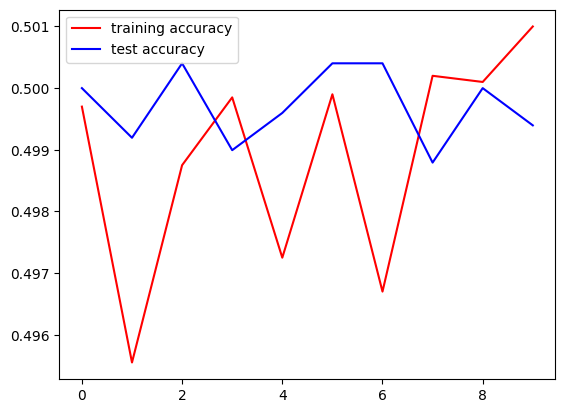

In [28]:
plt.plot(history.history['accuracy'], color = 'red', label = 'training accuracy')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'test accuracy')
plt.legend()
plt.show()